# Numerical experiment draft
## Linear regression case, with identity covariance matrix

In [2]:
# import packages here
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Generate data here

# set random seed
rng = np.random.default_rng(1)

# basic setting
var_epsilon = 1 # variance for noise in linear regression
d = 5 # d = 5,20,100,200
n = int(1e4) # sample size
eta = 1e0
alpha = 0.501 # step size eta_i = eta * i^{-alpha}
x_star = np.linspace(0,1,d) # optimal solution
x_0 = np.zeros(d) # initial guess

# mean and variance for generating a_i
# identity covariance matrix case
#
# linear regression model:
# b_i = x_star^\top a_i + \epsilon_i
mean_a = np.zeros(d)
cov_a = np.eye(d)
Asy_cov = np.eye(d) # asymptotic covariance matrix

In [14]:
# F for linear regression
#   F(x) = \mathbb{E} [1/2 (a^T x - b)^2]
#        = 1/2 (x-x_star)@cov_a@(x-x_star) + var_epsilon
def F_LR(x, cov_a, x_star, var_epsilon):
    return .5 * (x-x_star) @ cov_a @ (x-x_star) + var_epsilon


In [ ]:
# run sgd
#
# update rule:
#   a_n: normal distribution (mean_a, cov_a)
#   epsilon_n: normal distribution (0,sigma_epsilon)
#   b_n = a_n^T x_star + epilon_n (assume it is generated instead of computing from a_n and x_star)
#   x_n = x_{n-1} - \eta_n a_n (a_n^T x_{n-1} - b_n)

x_prev = x_0
x_history = []
x_bar_history = []
a_n_history = []
b_n_history = []
F_true = var_epsilon
F_x_history = []
F_x_bar_history = []
lr_history = []
for iter_num in range(n):
    # sample data
    a_n = rng.multivariate_normal(mean_a, cov_a)
    epsilon_n = rng.normal(0, var_epsilon)
    b_n = a_n @ x_star + epsilon_n
    # update learning rate
    eta_n = eta * (1+iter_num)**(-alpha)
    # update rule
    x_n = x_prev - eta_n * (a_n @ x_prev - b_n) * a_n
    x_prev = x_n
    # recording
    x_history.append(x_n)
    x_bar_history.append(np.mean(x_history, axis=0))
    a_n_history.append(a_n)
    b_n_history.append(b_n)
    F_x_history.append(F_LR(x_n, cov_a, x_star, var_epsilon))
    F_x_bar_history.append(F_LR(x_bar_history[iter_num], cov_a, x_star, var_epsilon))
    lr_history.append(eta_n)
    # output every 1000 iter
    if iter_num%1000==999:
        print(f'Iter \t[{iter_num+1}/{n}]\t\t finished')
    # debug code


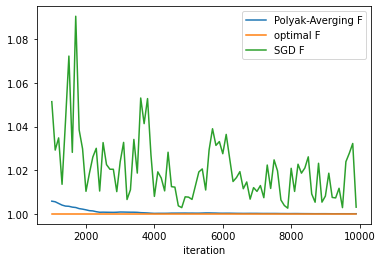

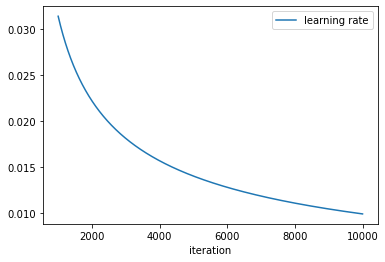

In [47]:
# have a look at the convergence
warmup_n = 1000
plot_every_n = 100
plt.plot(np.arange(warmup_n,n,plot_every_n), F_x_bar_history[warmup_n::plot_every_n])
plt.plot(np.arange(warmup_n,n,plot_every_n),F_true*np.ones(int((n-warmup_n) / plot_every_n)))
plt.plot(np.arange(warmup_n,n,plot_every_n),F_x_history[warmup_n::plot_every_n])
plt.legend(['Polyak-Averging F','optimal F','SGD F'])
plt.xlabel(f'iteration')
plt.show()

plt.plot(np.arange(warmup_n,n),lr_history[warmup_n:])
plt.legend(['learning rate'])
plt.xlabel(f'iteration')
plt.show()